## Setting up custom environment for your class

Please e-mail [CSES](mailto:cses@princeton.edu) asking them to setup a course environment on Adroit. Once they have done so, you can load the base environment with

```module load course/geo203/default```

and you now own that directory and all files within. They will also put *GEO203* under the *class* tab on the webpage for starting a new [Jupyter for Classes](https://myadroit.princeton.edu/pun/sys/dashboard/batch_connect/sys/jupyter-classes/session_contexts/new) session on Adroit.

The simplest thing
would be to try to install all you need within the base install (```conda
install pandoc``` .... and whatever else you need), without creating/loading
conda environments but up to you.


## JupyterLab

You can install [Jupyter notebook extensions](https://github.com/ipython-contrib/jupyter_contrib_nbextensions), which can improve your productivity in the notebook environment. Some useful extensions include Table of Contents, Gist-it, Autopep8, Variable Inspector, etc. See [this post](https://towardsdatascience.com/jupyter-notebook-extensions-517fa69d2231) for more information.

```conda install jupyter_contrib_nbextensions -c conda-forge```

## PDF output from Jupyter notebooks

```conda install -c conda-forge texlive-core```

## Instructions for students

1. Log-in to [MyAdroit](https://myadroit.princeton.edu/) using your Princeton ID.
2. Start a new Jupyter session by selecting "Interactive Apps" and then "Jupyter **for Classes**"
3. Choose the number of hours (the higher number, the longer the wait time). Keep the number of cores to 1. Select "GEO 203" for class and "class" for partition. DO NOT FORGET to check "Use JupyterLab instead of Jupyter Notebook?" option. Then, launch.
4. Open the terminal by clicking at the session ID. (The terminal opened by Jupyter does not work properly.)
5. For the first time, clone the [repository](https://github.com/PrincetonUniversity/GEO203_Fall2022_PSETS) for the problem sets using the following command 

`git clone git@github.com:PrincetonUniversity/GEO203_Fall2022_PSETS.git`

After the first time, get your local repository updated by pulling from the remote repository `git pull`

6. Check the status of your local repository: `git status`
7. Launch Jupyter and open one of the Jupyter notebooks
8. Edit one of the Markdown cell and run.
9. Check the status of your local repository: `git status`. See if there is any change.
10. To revert the change on the Jupyter notebook, call `git stash`.
11. Duplicate the problem set Jupyter notebook and rename to `[original file name]-[Princeton ID].ipynb`. Only work on the duplicated copy.
12. After you make a change on your notebook, add a the file and commit using the following commands.

`git add -f [your notebook file name]`

`git commit -m "your message"`

13. To push the commit,

`git pull` to avoid merge conflict when you push your commits to the remote repository. If someone also makes changes on the file, merge conflict may occur in your local repository. If the conflict occurs, you need to resolve the merge conflict.

`git push`

There are cases when merge occurs with out the merge conflict. You will automatically enter a default text-editor (usually Vim) and be prompted to enter a message. You do not need to enter any message. To exit the editor, press `Esc` and then type`:wq!` and press `return`.

----
# Visualization

## 1. General plotting with Matplotlib 

## 2. Plotting geographic data with Basemap

A common type of visualization in data science is that of geographic data. Matplotlib's main tool for this type of visualization is the Basemap toolkit, which is one of several Matplotlib toolkits which lives under the `mpl_toolkits` namespace. Basemap feels a bit clunky to use, and often even simple visualizations take much longer to render than you might hope. More modern solutions such as leaflet or the Google Maps API may be a better choice for more intensive map visualizations. Still, Basemap is a useful tool for Python users to have in their virtual toolbelts. 

Installation of Basemap is straightforward; if you're using conda you can type this and the package will be downloaded:

```conda install -c conda-forge basemap```

You may install some mapping toolboxes (Basemap data) with the following options to add topography at all resolutions: 

```conda install -c conda-forge basemap-data-hires```

Basemap installation may give errors for the PROJ4 library. We have found it useful to specify the location of the library using the following in our shell configuration. 

| bash / ksh                            | Explanation                                                                                               | tcsh csh                                                                   |
|--------------------------------------------|-----------------------------------------------------------------------------------------------------------|--------------------------------------------------------------------------------------|
| `export PROJ_LIB=$_CONDA_ROOT/share/proj`                            | Put this in your shell initilization file (e.g. `~/.tcshrc` or `~/.bashrc`)                                               | `setenv PROJ_LIB $_CONDA_ROOT/share/proj`                                                                      |


On Adroit, `_CONDA_ROOT` is the location of Anaconda installation, which should be automatically initialized with the value `/opt/export/course/geo203/anaconda3` when you login to Adroit. 

Your default shell can be found out by displaying the following [environment variable](https://en.wikipedia.org/wiki/Environment_variable) on the command line: ```echo $SHELL``` or with the following magic command on JupyterLab:

In [6]:
%env

{'CONDA_SHLVL': '1',
 'SLURM_MEM_PER_CPU': '3200',
 'CONDA_EXE': '/opt/export/course/geo203/anaconda3/bin/conda',
 'HOSTTYPE': 'x86_64-linux',
 'SLURM_NODEID': '0',
 'SLURM_TASK_PID': '827333',
 'MODULES_RUN_QUARANTINE': 'LD_LIBRARY_PATH LD_PRELOAD',
 'LANG': 'en_US.UTF-8',
 'SLURM_SUBMIT_DIR': '/var/www/ood/apps/sys/dashboard',
 'HOSTNAME': 'adroit-11',
 'OLDPWD': '/home/pm5113/ondemand/data/sys/dashboard/batch_connect/sys/jupyter-classes/output/cd19a609-a8d9-445c-8287-ced48804f952',
 'COBBLER_SERVER': '172.21.2.10',
 'SLURM_CPUS_PER_TASK': '1',
 'ENVIRONMENT': 'BATCH',
 'PATH_modshare': '/usr/sbin:1:/opt/export/course/geo203/anaconda3/bin:1:/usr/bin:1:/opt/puppetlabs/bin:1:/opt/dell/srvadmin/bin:1:/usr/local/sbin:1:/usr/share/Modules/bin:1:/usr/local/bin:1',
 'LOADEDMODULES_modshare': 'course/geo203/default:1',
 'CONDA_PREFIX': '/opt/export/course/geo203/anaconda3',
 'SLURM_PROCID': '0',
 'SLURM_JOB_GID': '1029',
 'VENDOR': 'unknown',
 'MACHTYPE': 'x86_64',
 'SLURMD_NODENAME': 'adroi

In [2]:
import os
os.environ['PROJ_LIB'] = os.path.join(os.environ['CONDA_PREFIX'],'share/proj')

Now, let us look at some plots

In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

## 3. Plotly for interactive visualization

For use in JupyterLab, install the jupyterlab and ipywidgets packages using pip:

```conda install "jupyterlab>=3" "ipywidgets>=7.6"```

You'll need jupyter-dash to add widgets such as sliders, dropdowns, and buttons to Plotly charts in JupyterLab. Install jupyter-dash using conda:

```conda install -c conda-forge -c plotly jupyter-dash```

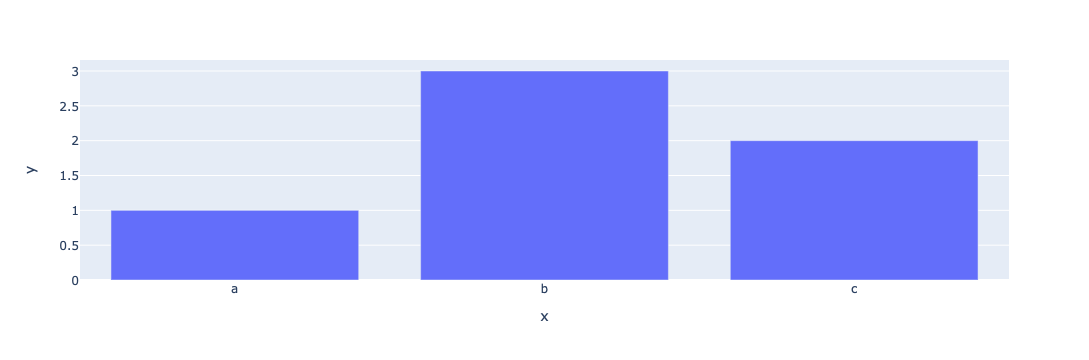

In [16]:
import plotly.express as px
fig = px.bar(x=["a", "b", "c"], y=[1, 3, 2])
fig.show()

Some plotly features rely on fairly large geographic shape files. The county choropleth figure factory is one such example. These shape files are distributed as a separate plotly-geo package. 

```conda install -c plotly plotly-geo=1.0.0```